In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')  
dataset.drop(dataset.index[dataset['child_age'] == 4], inplace = True)
dataset.drop(dataset.index[dataset['child_age'] == 5], inplace = True)
dataset = dataset[dataset.mean_reaction_time != 0]
dataset.head()
# statistics of the data
dataset.describe()

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,cer
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,157.818182,1.500000,6.500000,12.079545,11.409091,1.329545,0.670455,986.477273,68542.261364,93.120735,6.879265,9.875897
std,121.096480,0.502865,0.502865,4.918232,4.898126,2.855612,0.943478,195.029616,26733.719789,10.318840,10.318840,18.055391
min,23.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,448.000000,2125.000000,50.000000,0.000000,0.000000
25%,64.750000,1.000000,6.000000,8.000000,7.000000,0.000000,0.000000,830.500000,57000.000000,87.500000,0.000000,0.000000
50%,138.500000,1.500000,6.500000,12.000000,12.000000,0.000000,0.000000,1023.500000,60000.000000,100.000000,0.000000,0.000000
75%,205.500000,2.000000,7.000000,15.250000,14.250000,1.000000,1.000000,1099.000000,87000.000000,100.000000,12.500000,12.500000
max,363.000000,2.000000,7.000000,28.000000,23.000000,15.000000,5.000000,1397.000000,179629.000000,100.000000,50.000000,78.947368


In [3]:
x = dataset.iloc[:, [7]].values  
display(x)

array([[1023],
       [1397],
       [ 961],
       [ 804],
       [1180],
       [ 994],
       [ 448],
       [ 733],
       [1083],
       [ 771],
       [ 668],
       [ 838],
       [1338],
       [1106],
       [ 987],
       [1181],
       [1179],
       [ 670],
       [ 614],
       [ 778],
       [ 778],
       [ 832],
       [1173],
       [1007],
       [1025],
       [1012],
       [ 845],
       [ 850],
       [ 586],
       [ 845],
       [1033],
       [ 867],
       [ 901],
       [ 955],
       [ 780],
       [ 694],
       [ 719],
       [1041],
       [1298],
       [1080],
       [1284],
       [1140],
       [1125],
       [ 819],
       [ 783],
       [ 901],
       [ 976],
       [ 826],
       [ 855],
       [ 885],
       [1031],
       [1082],
       [1061],
       [1374],
       [ 940],
       [1071],
       [1102],
       [1146],
       [ 792],
       [1070],
       [1087],
       [1230],
       [1128],
       [ 814],
       [1326],
       [1298],
       [ 7

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)

array([[ 1.88340771e-01],
       [ 2.11698777e+00],
       [-1.31381459e-01],
       [-9.41000654e-01],
       [ 9.97959966e-01],
       [ 3.87932764e-02],
       [-2.77682507e+00],
       [-1.30713417e+00],
       [ 4.97749380e-01],
       [-1.11117539e+00],
       [-1.64232683e+00],
       [-7.65669108e-01],
       [ 1.81273597e+00],
       [ 6.16356014e-01],
       [ 2.69560531e-03],
       [ 1.00311678e+00],
       [ 9.92803156e-01],
       [-1.63201321e+00],
       [-1.92079458e+00],
       [-1.07507772e+00],
       [-1.07507772e+00],
       [-7.96609969e-01],
       [ 9.61862295e-01],
       [ 1.05831808e-01],
       [ 1.98654391e-01],
       [ 1.31615859e-01],
       [-7.29571437e-01],
       [-7.03787386e-01],
       [-2.06518527e+00],
       [-7.29571437e-01],
       [ 2.39908873e-01],
       [-6.16121614e-01],
       [-4.40790068e-01],
       [-1.62322320e-01],
       [-1.06476410e+00],
       [-1.50824977e+00],
       [-1.37932952e+00],
       [ 2.81163354e-01],
       [ 1.6

In [5]:
x = dataset.iloc[:, [2, 7]].copy()
x['mean_reaction_time'] = new_df
x.head()
x = x.to_numpy()
display(x)

array([[ 6.00000000e+00,  1.88340771e-01],
       [ 6.00000000e+00,  2.11698777e+00],
       [ 6.00000000e+00, -1.31381459e-01],
       [ 6.00000000e+00, -9.41000654e-01],
       [ 6.00000000e+00,  9.97959966e-01],
       [ 6.00000000e+00,  3.87932764e-02],
       [ 6.00000000e+00, -2.77682507e+00],
       [ 6.00000000e+00, -1.30713417e+00],
       [ 6.00000000e+00,  4.97749380e-01],
       [ 7.00000000e+00, -1.11117539e+00],
       [ 7.00000000e+00, -1.64232683e+00],
       [ 7.00000000e+00, -7.65669108e-01],
       [ 7.00000000e+00,  1.81273597e+00],
       [ 7.00000000e+00,  6.16356014e-01],
       [ 7.00000000e+00,  2.69560531e-03],
       [ 7.00000000e+00,  1.00311678e+00],
       [ 7.00000000e+00,  9.92803156e-01],
       [ 6.00000000e+00, -1.63201321e+00],
       [ 6.00000000e+00, -1.92079458e+00],
       [ 6.00000000e+00, -1.07507772e+00],
       [ 6.00000000e+00, -1.07507772e+00],
       [ 6.00000000e+00, -7.96609969e-01],
       [ 6.00000000e+00,  9.61862295e-01],
       [ 6.

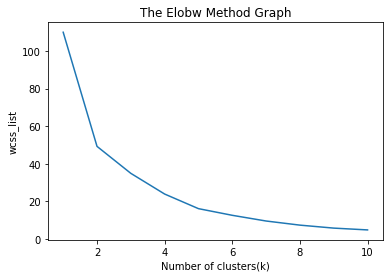

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

[0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


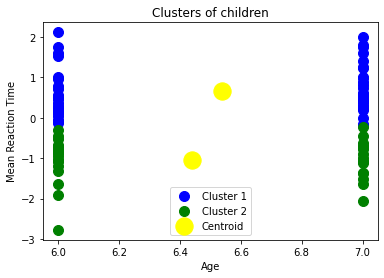

In [16]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
#mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster 
#mtp.scatter(x[y_predict== 3, 0], x[y_predict == 3, 1], s = 100, c = 'deeppink', label = 'Cluster 4') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.ylabel('Mean Reaction Time')  
mtp.xlabel('Age')  
mtp.legend()  
mtp.show()  

In [31]:
newData = scaler.transform([[450]])
newData
newData[0,0]
kmeans.predict([[6, newData[0,0]]])

array([1])

In [33]:
import pickle
s = pickle.dumps(kmeans, "model.pkl")
model_filw

TypeError: an integer is required (got type str)

In [38]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [34]:
import cPickle
# save the classifier
with open('model.pkl', 'wb') as fid:
    cPickle.dump(kmeans, fid)    

# load it again
with open('model.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)

ModuleNotFoundError: No module named 'cPickle'

In [8]:
new_df = dataset.iloc[:, [2, 7]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,clusters
22,6,1023,0
23,6,1397,0
24,6,961,0
25,6,804,1
26,6,1180,0
...,...,...,...
358,7,1045,0
359,7,1159,0
360,7,1257,0
361,7,1044,0


In [35]:
!pip install cPickle

ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
You should consider upgrading via the 'c:\users\anuththara\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Cluster Analysis

## Cluster 1

In [9]:
len(new_df[new_df["clusters"] == 0])

54

In [10]:
cluster_1 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print(minVal)
print(maxVal)

955
1397


,child_age,mean_reaction_time,clusters
22,6,1023,0
23,6,1397,0
24,6,961,0
26,6,1180,0
27,6,994,0
30,6,1083,0
34,7,1338,0
35,7,1106,0
36,7,987,0
37,7,1181,0


<AxesSubplot:>

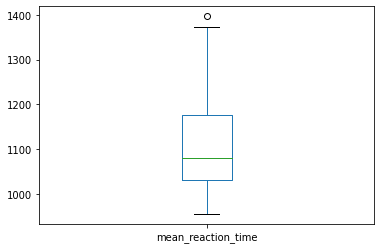

In [11]:
display(cluster_1)
cluster_1.boxplot(column =['mean_reaction_time'], grid = False)

## Cluster 2

In [12]:
len(new_df[new_df["clusters"] == 1])

34

In [13]:
cluster_2 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_2['mean_reaction_time'].max()
minVal = cluster_2['mean_reaction_time'].min()

print(minVal)
print(maxVal)

448
940


,child_age,mean_reaction_time,clusters
25,6,804,1
28,6,448,1
29,6,733,1
31,7,771,1
32,7,668,1
33,7,838,1
59,6,670,1
60,6,614,1
61,6,778,1
62,6,778,1


<AxesSubplot:>

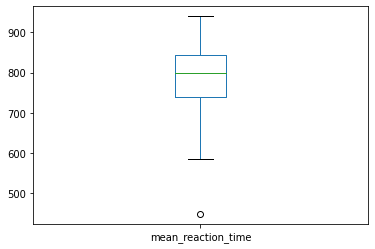

In [14]:
display(cluster_2)
cluster_2.sort_values('mean_reaction_time')
cluster_2.boxplot(column =['mean_reaction_time'], grid = False)

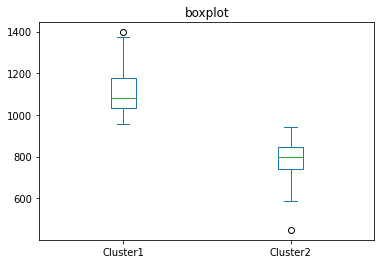

In [15]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_1['mean_reaction_time'], "Cluster2": cluster_2['mean_reaction_time']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

## Cluster 3

In [16]:
len(new_df[new_df["clusters"] == 2])

0

In [17]:
cluster_3 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_3['mean_reaction_time'].max()
minVal = cluster_3['mean_reaction_time'].min()

print(minVal)
print(maxVal)

nan
nan


,child_age,mean_reaction_time,clusters


<AxesSubplot:>

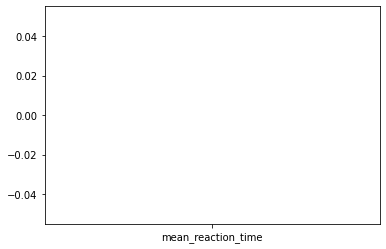

In [18]:
display(cluster_3)
cluster_3.sort_values('mean_reaction_time')
cluster_3.boxplot(column =['mean_reaction_time'], grid = False)

## Cluster 4

In [19]:
len(new_df[new_df["clusters"] == 3])

0

In [20]:
cluster_4 = new_df[new_df["clusters"] == 3 ]

maxVal = cluster_4['mean_reaction_time'].max()
minVal = cluster_4['mean_reaction_time'].min()

print(minVal)
print(maxVal)

nan
nan


,child_age,mean_reaction_time,clusters


<AxesSubplot:>

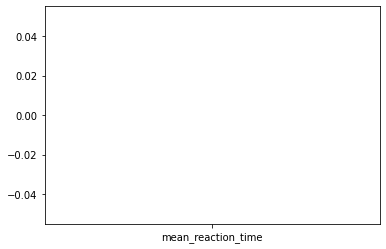

In [21]:
display(cluster_4)
cluster_4.sort_values('mean_reaction_time')
cluster_4.boxplot(column =['mean_reaction_time'], grid = False)

In [22]:
print(scaler.transform([[4, 1520]]))
kmeans.predict(scaler.transform([[4, 1520]]))

ValueError: X has 2 features, but StandardScaler is expecting 1 features as input.